In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os

# DONT RUN AGAIN

In [2]:
#100k pkl jet file already in folder
'''

from numpy import load

directory = 'jets/jets'
labels = ['Gluon', 'Light quark', 'W boson', 'Z boson', 'Top quark']
#features = ['n', 'phi', 'E', 'R', 'length','label']
features = ['n', 'phi', 'E', 'label']

nf = 0
cap = 100000

df = pd.DataFrame(columns = features)


for filename in tqdm(os.scandir(directory)):
    if (nf == cap):
        break
    nf += 1
    with np.load(filename) as npz:
        flist = npz['x'].T
        llist = npz['y']
        lb = labels[np.where(llist == 1)[0][0]]
        #tmp = pd.DataFrame({'n':[flist[1]], 'phi':[flist[2]], 'E':[flist[3]], 'label':lb})
        tmp = pd.DataFrame({'n':[flist[1]], 'phi':[flist[2]], 'E':[flist[3]], 'label':lb})
        df = pd.concat([tmp, df], ignore_index = True)
        
df.to_pickle("100kjets.pkl")



#X = df.loc[:, df.columns != 'label']
#y = df.label
'''

'\n\nfrom numpy import load\n\ndirectory = \'jets/jets\'\nlabels = [\'Gluon\', \'Light quark\', \'W boson\', \'Z boson\', \'Top quark\']\n#features = [\'n\', \'phi\', \'E\', \'R\', \'length\',\'label\']\nfeatures = [\'n\', \'phi\', \'E\', \'label\']\n\nnf = 0\ncap = 100000\n\ndf = pd.DataFrame(columns = features)\n\n\nfor filename in tqdm(os.scandir(directory)):\n    if (nf == cap):\n        break\n    nf += 1\n    with np.load(filename) as npz:\n        flist = npz[\'x\'].T\n        llist = npz[\'y\']\n        lb = labels[np.where(llist == 1)[0][0]]\n        #tmp = pd.DataFrame({\'n\':[flist[1]], \'phi\':[flist[2]], \'E\':[flist[3]], \'label\':lb})\n        tmp = pd.DataFrame({\'n\':[flist[1]], \'phi\':[flist[2]], \'E\':[flist[3]], \'label\':lb})\n        df = pd.concat([tmp, df], ignore_index = True)\n        \ndf.to_pickle("100kjets.pkl")\n\n\n\n#X = df.loc[:, df.columns != \'label\']\n#y = df.label\n'

# Load Dataset

In [3]:
df = pd.read_pickle("100kjets.pkl")
X = df.loc[:, df.columns != 'label']
y = df.label

n vs phi


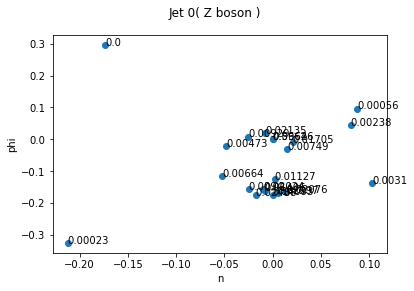

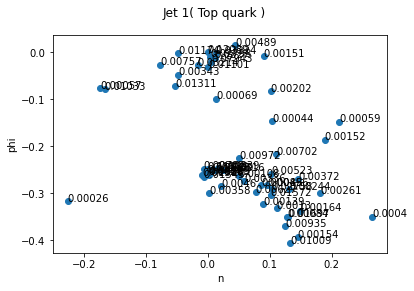

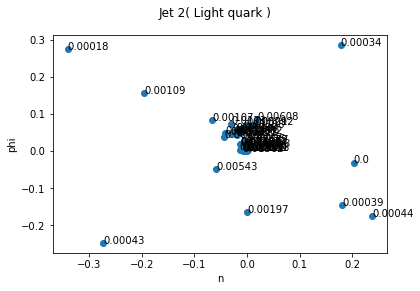

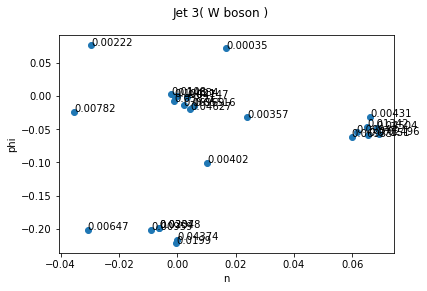

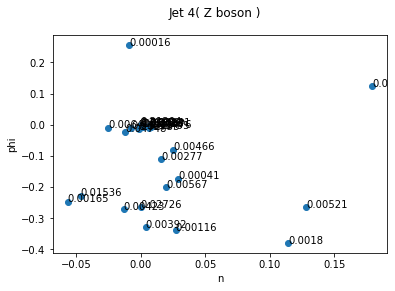

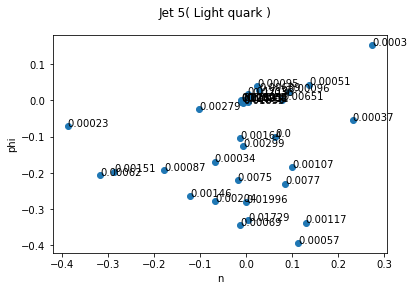

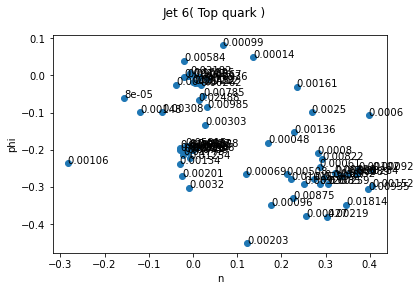

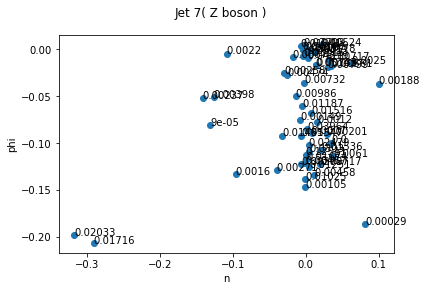

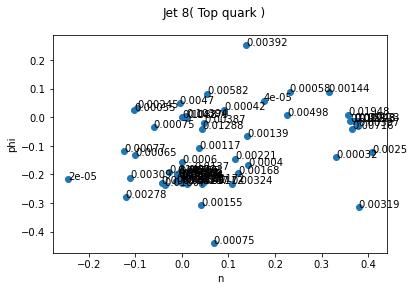

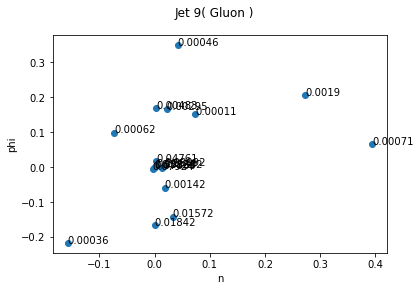

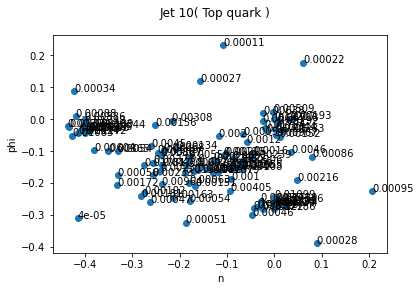

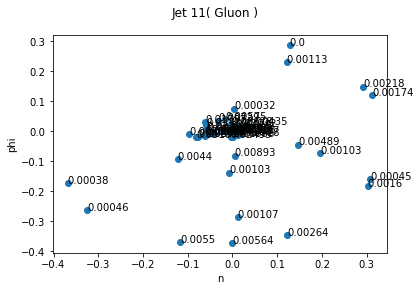

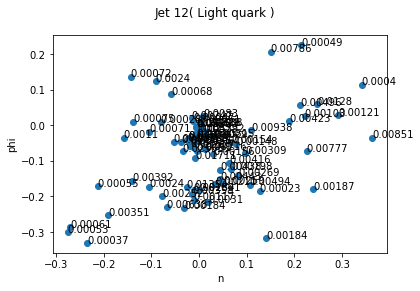

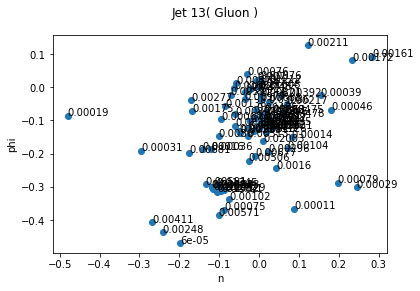

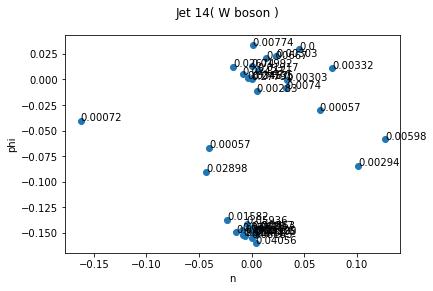

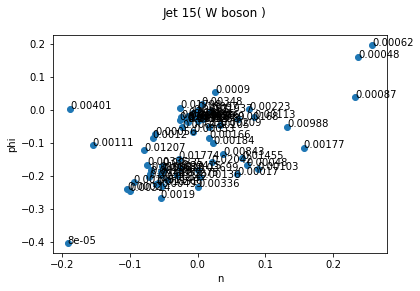

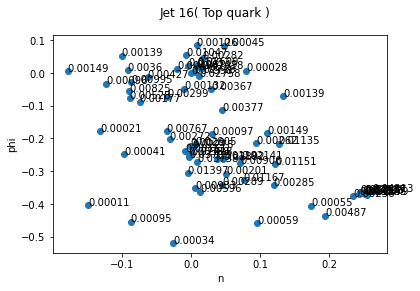

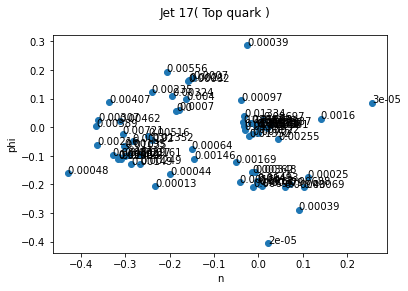

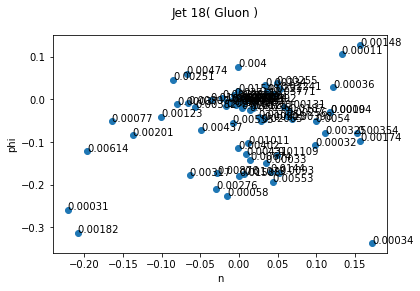

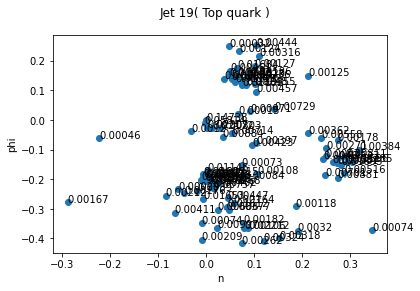

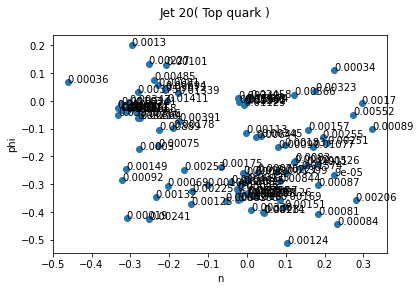

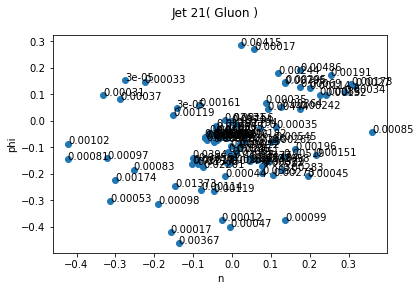

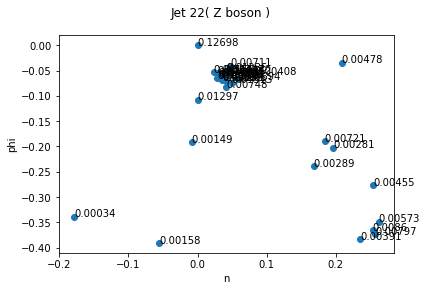

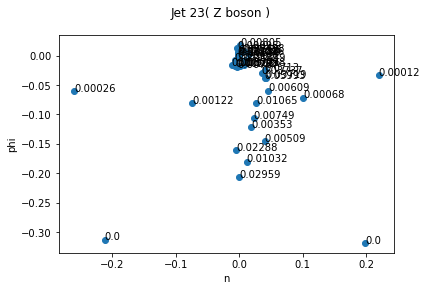

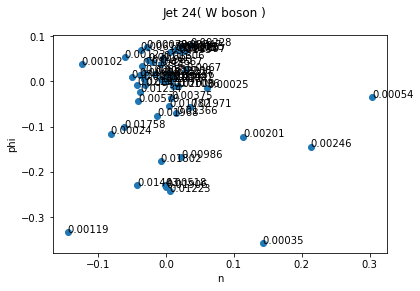

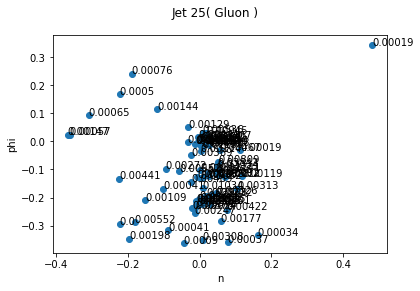

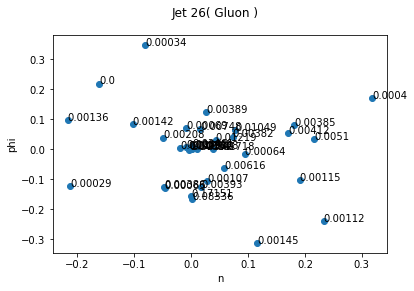

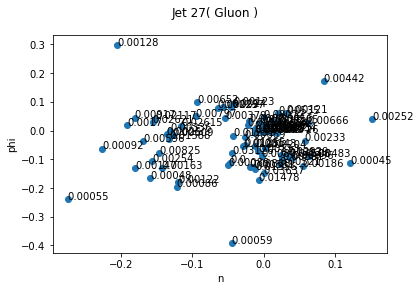

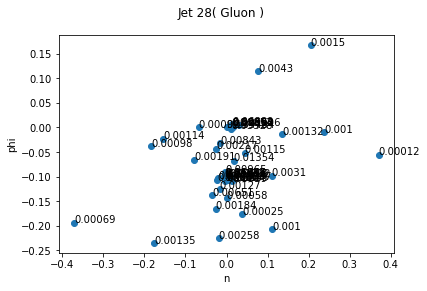

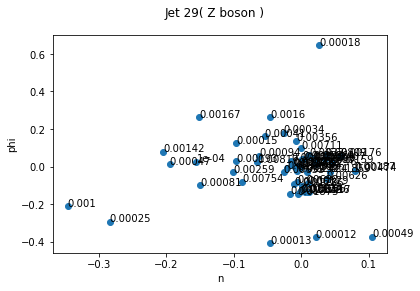

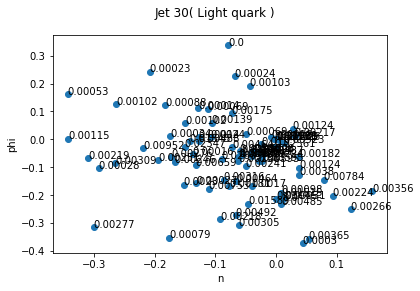

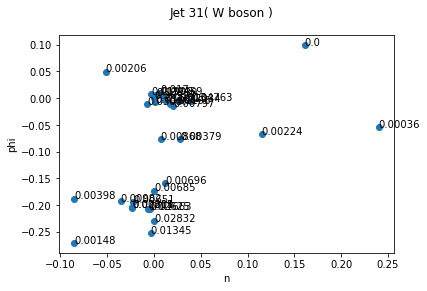

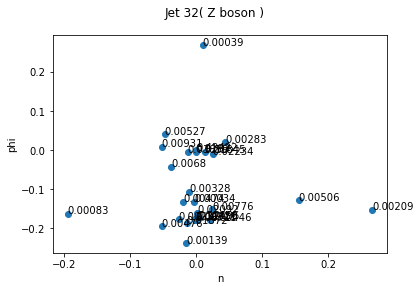

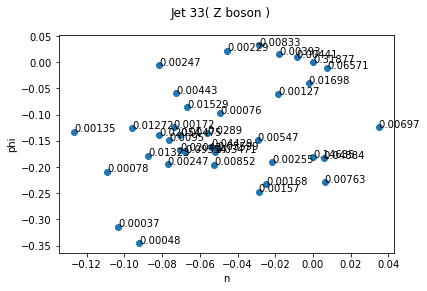

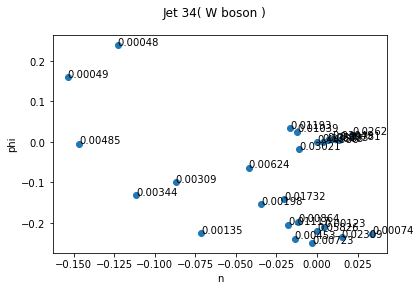

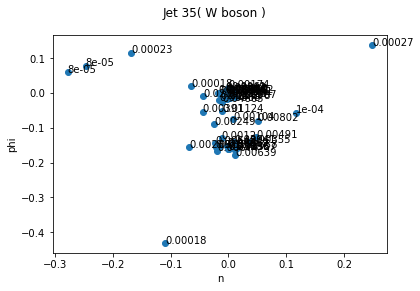

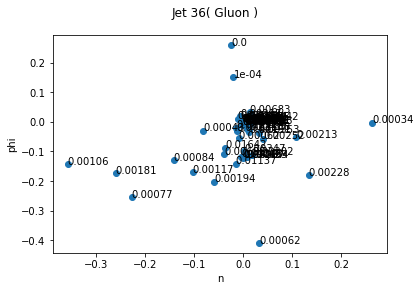

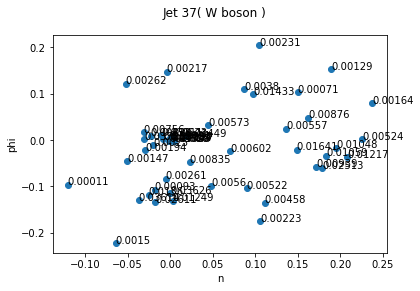

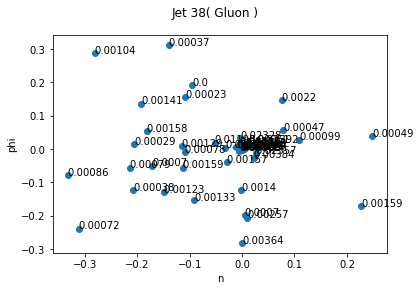

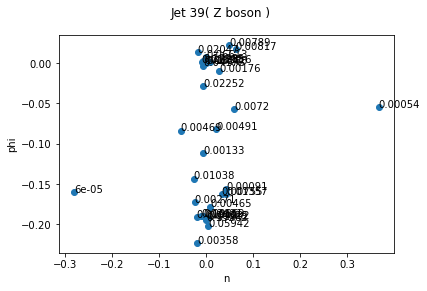

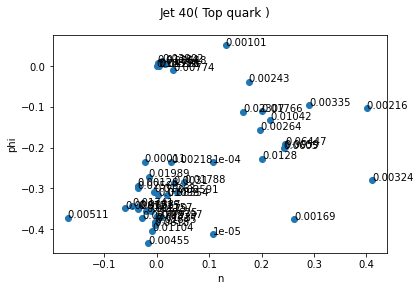

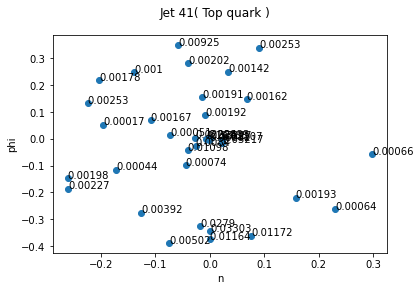

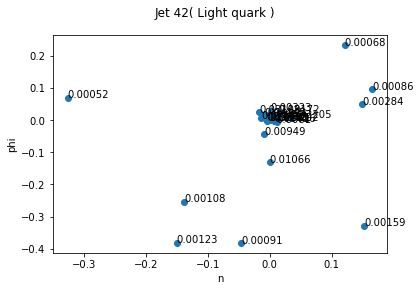

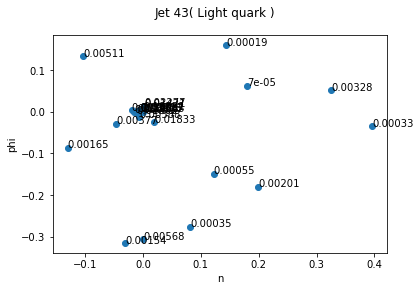

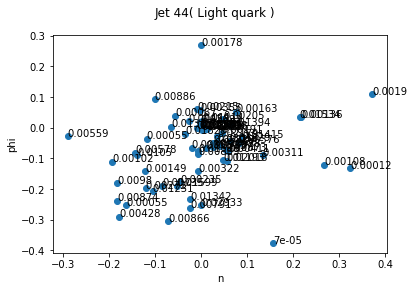

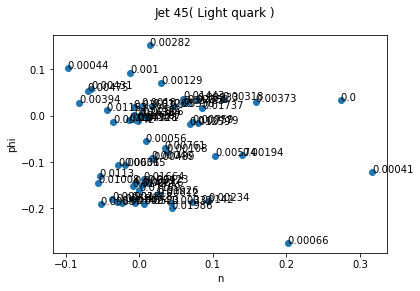

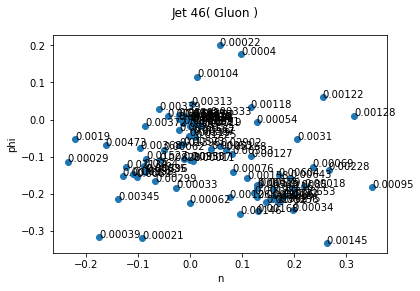

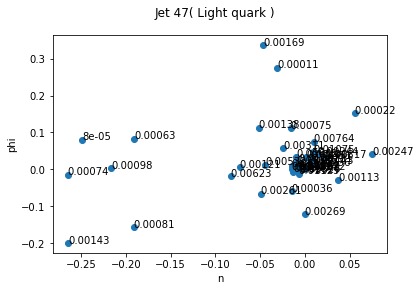

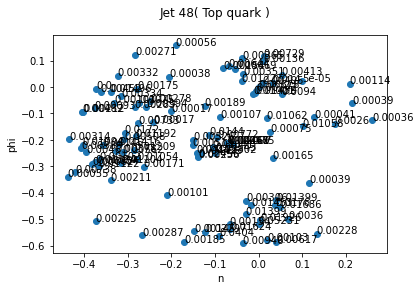

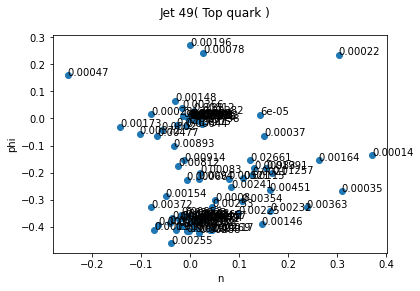

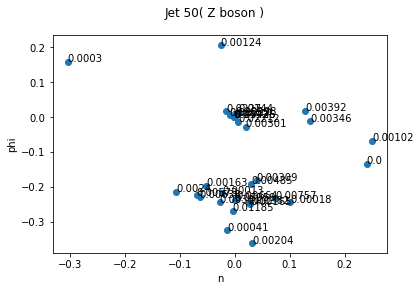

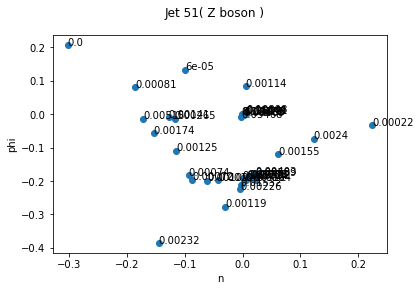

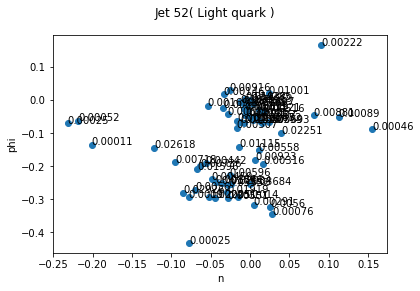

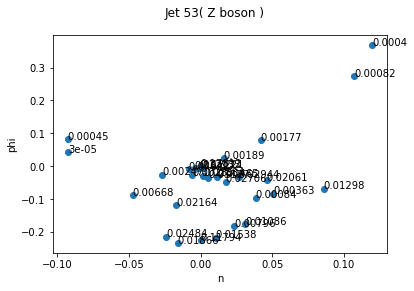

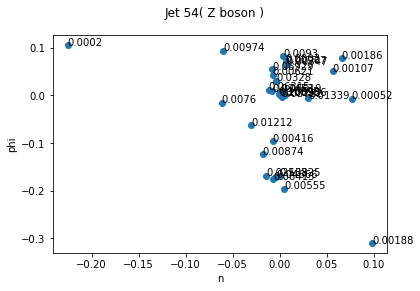

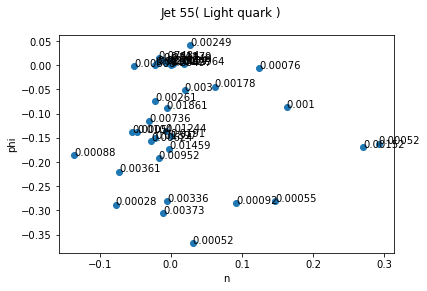

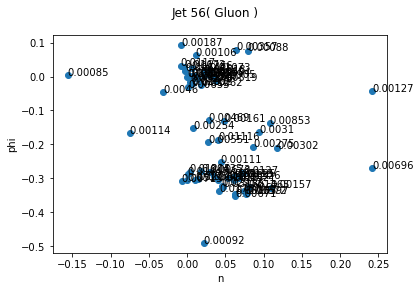

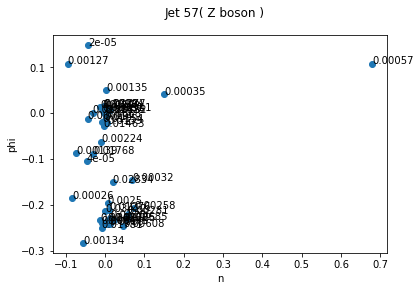

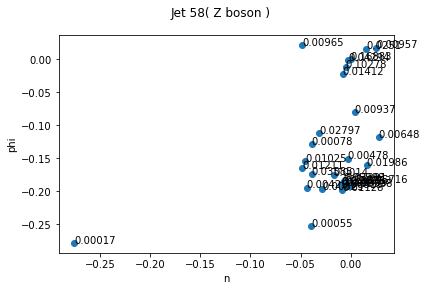

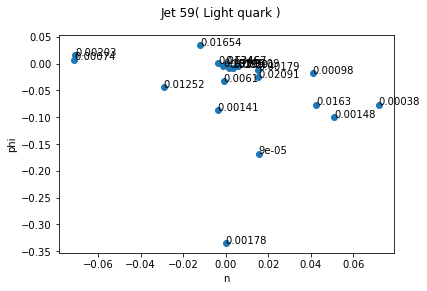

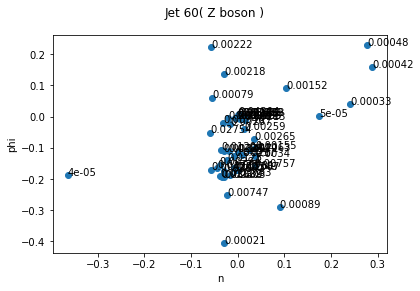

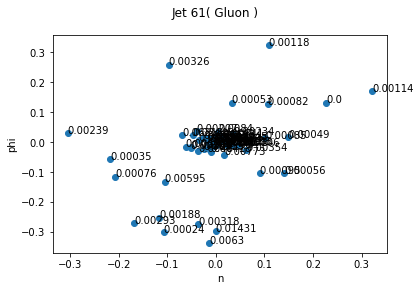

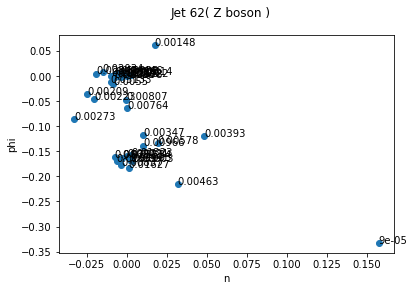

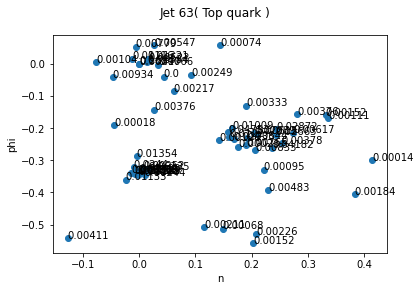

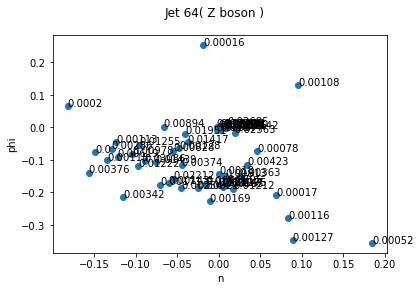

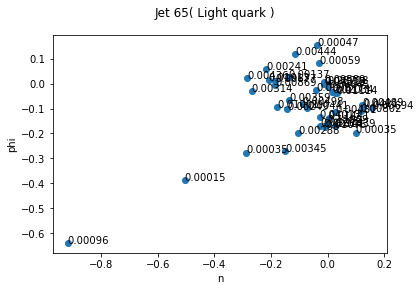

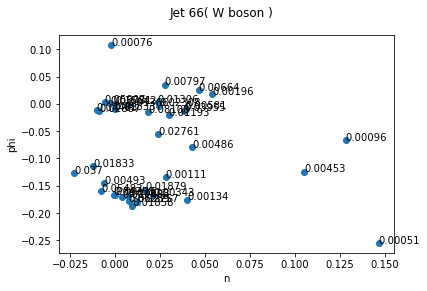

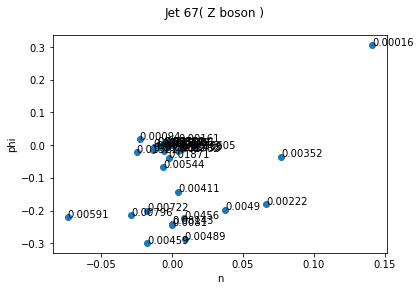

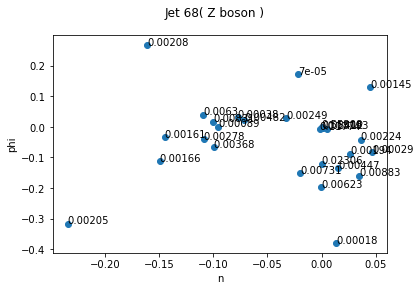

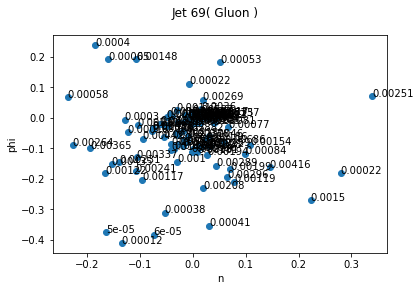

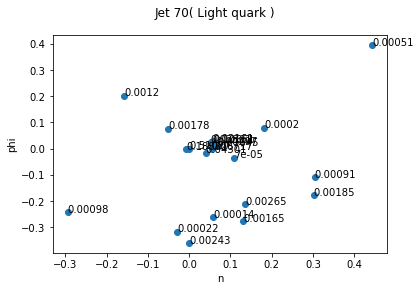

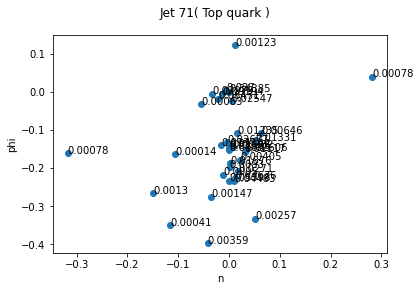

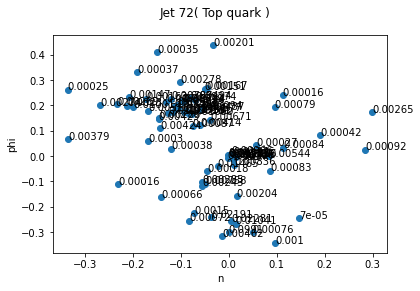

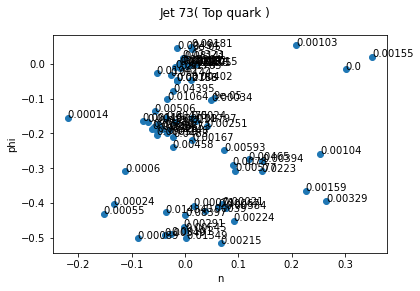

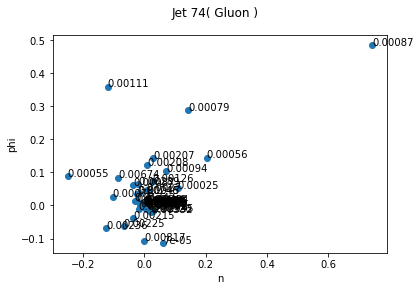

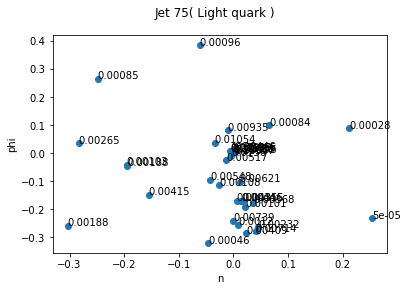

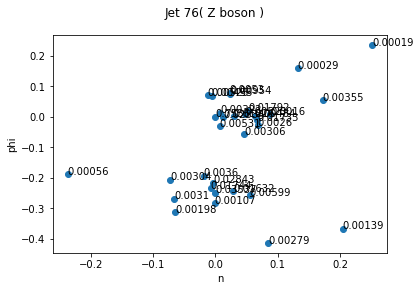

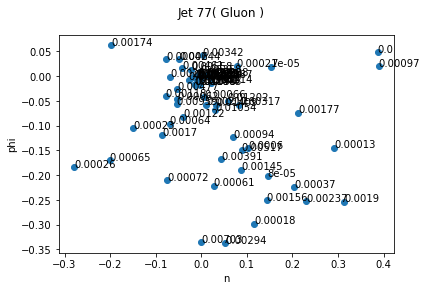

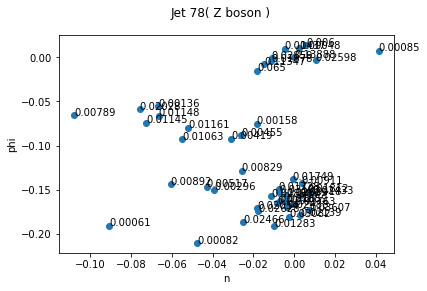

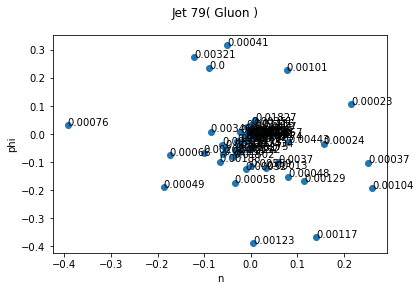

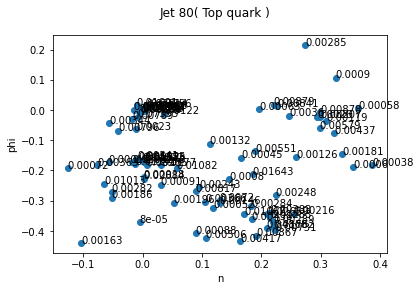

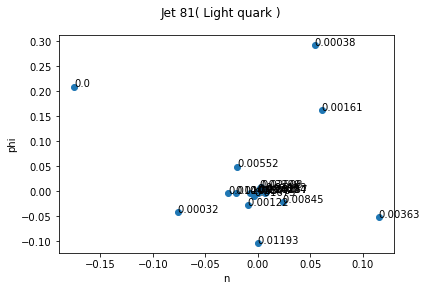

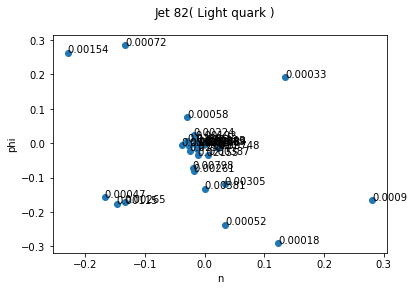

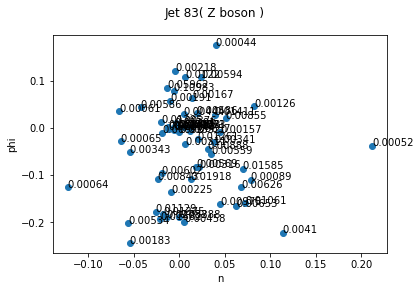

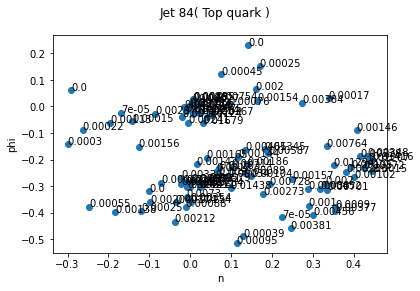

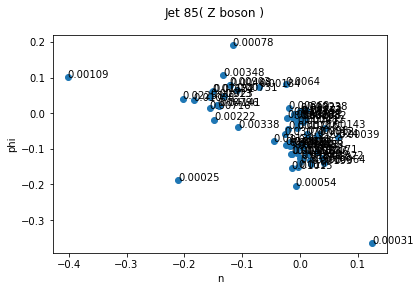

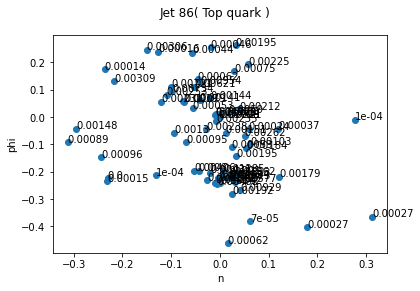

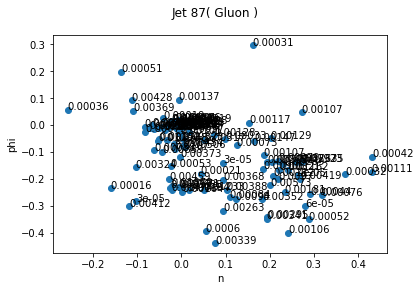

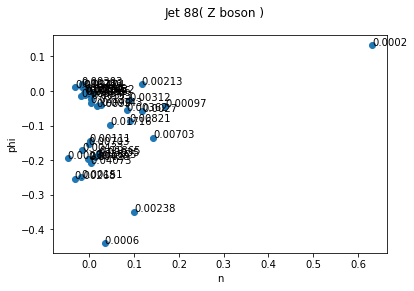

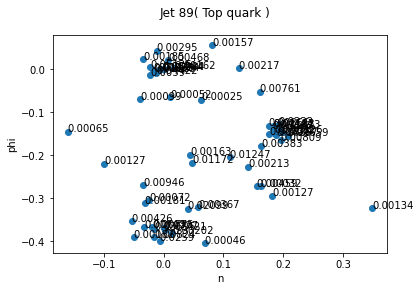

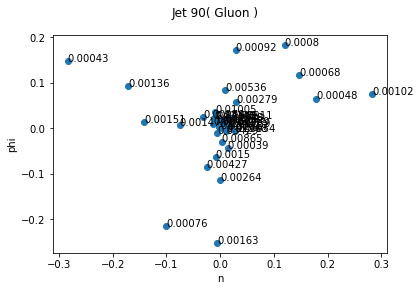

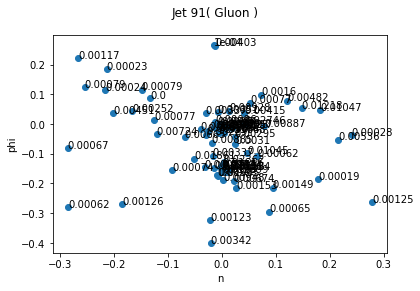

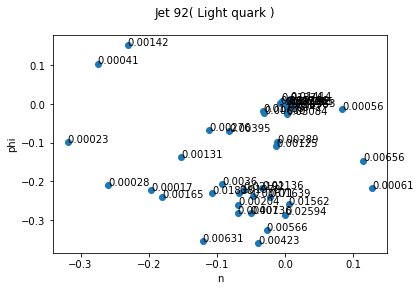

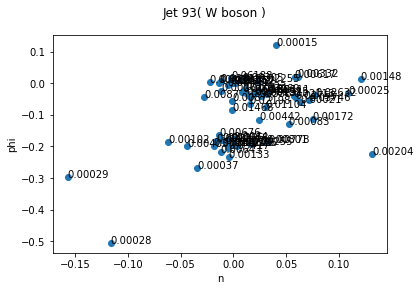

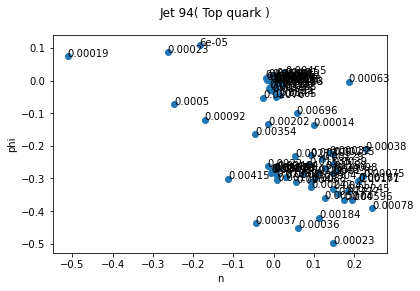

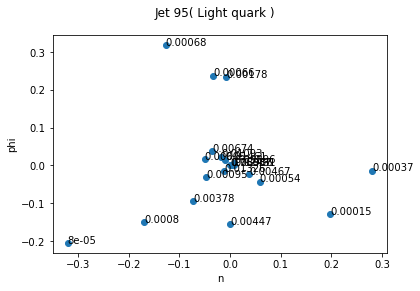

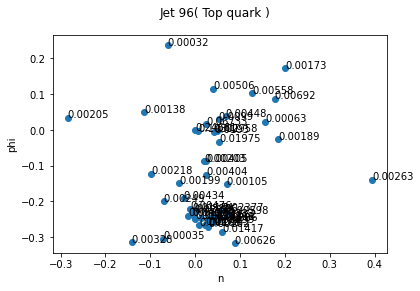

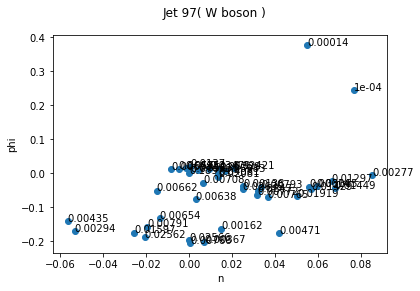

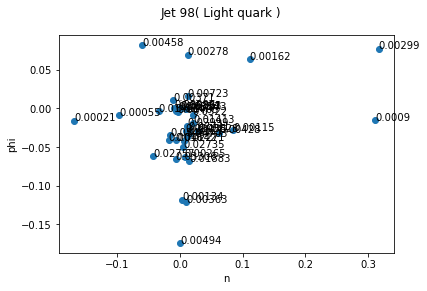

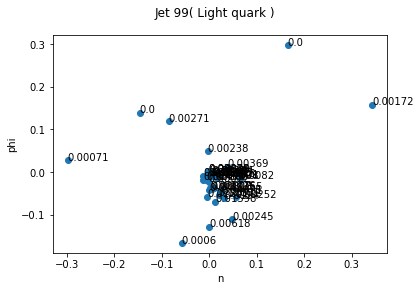

Correlation of n and phi is 0.23603817979105815


"\nfor x in range(ds_size):\n    #array of said feature for xth jet\n    v1 = df.iloc[x][fv]\n    v2 = df.iloc[x][sv]\n    fig = plt.figure(figsize=(1, 1))\n    plt.scatter(v1, v2)\n    plt.axis('off')\n    plt.savefig('jetimages/Jet' + str(x) + df.iloc[x]['label'] + '.png')\n"

In [4]:
#phi vs eta labelled with energy

fv = 'n'
sv = 'phi'
print(fv + " vs " + sv)
arr = []

ds_size = 100

for x in range(ds_size):
    #array of said feature for xth jet
    v1 = df.iloc[x][fv]
    v2 = df.iloc[x][sv]
    arr.append(abs(np.corrcoef(v1,v2)[0][1]))
    fig = plt.figure()#figsize=(3, 3))
    plt.scatter(v1, v2)    
    fig.suptitle('Jet ' + str(x) + '( ' + df.iloc[x]['label'] + ' )')
    plt.xlabel(fv)
    plt.ylabel(sv)
    
    
    for i, label in enumerate(df.iloc[x]['E']):
        plt.annotate(round(label, 5), (v1[i], v2[i]))
    plt.show()
    
print('Correlation of ' + fv + ' and ' + sv + ' is ' + str(sum(arr)/len(arr)))
'''
for x in range(ds_size):
    #array of said feature for xth jet
    v1 = df.iloc[x][fv]
    v2 = df.iloc[x][sv]
    fig = plt.figure(figsize=(1, 1))
    plt.scatter(v1, v2)
    plt.axis('off')
    plt.savefig('jetimages/Jet' + str(x) + df.iloc[x]['label'] + '.png')
'''

# Preprocessing

In [5]:
import torch
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import energyflow

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import sklearn.preprocessing

ds_size = 100000

le = 16
wi = 16

X = []
y = np.array([])

labels = ['Gluon', 'Light quark', 'W boson', 'Z boson', 'Top quark']
        

def normalize(arr, t_min, t_max, minarr, maxarr):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


for x in tqdm(range(ds_size)):
    eta1 = df.iloc[x]['n']
    phi1 = df.iloc[x]['phi']
    E = df.iloc[x]['E']
    eta = np.round(normalize(eta1, 0, wi-1, -1, 1), 0).astype(int)
    phi = np.round(normalize(phi1, 0, le-1, -1, 1), 0).astype(int)

    #print(eta)
    
    
    img = np.zeros((le, wi))
    la = labels.index(df.iloc[x]['label'])
    
    for i in range(0, len(phi)-1):
        img[eta[i] - 1, phi[i] - 1] += E[i] 
        
    #plt.title(la)
    #plt.imshow(img, interpolation='nearest', cmap='Greys')
    #plt.show()
    
    X.insert(x, img)
    y = np.append(y, la)

X = np.asarray(X)
print(X.shape)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [01:49<00:00, 912.60it/s]


(100000, 16, 16)


(100000, 16, 16)
(100000,)


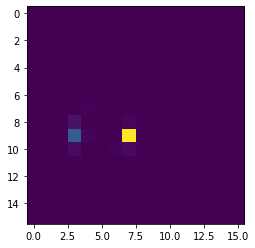

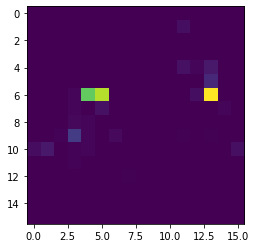

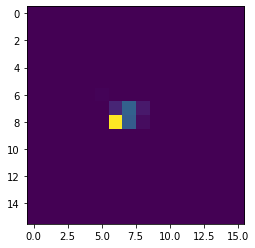

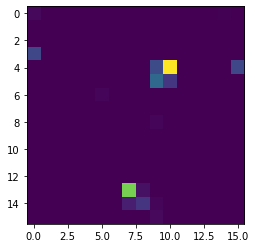

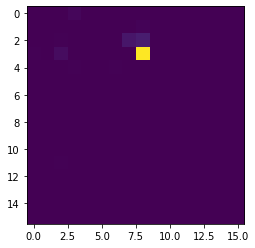

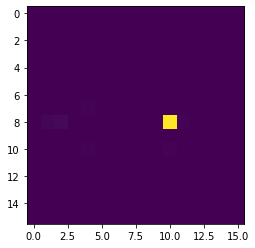

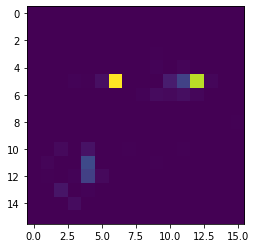

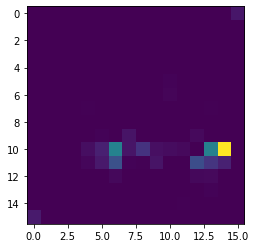

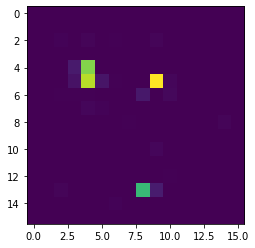

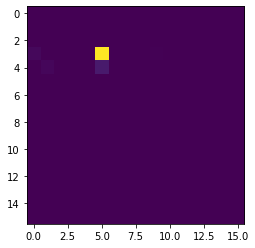

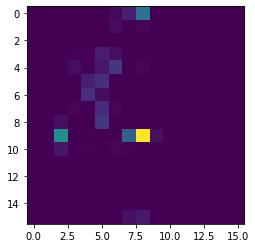

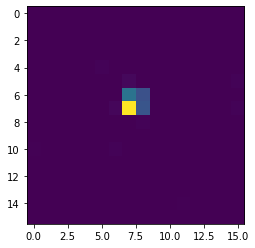

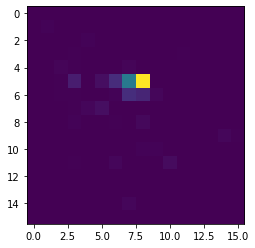

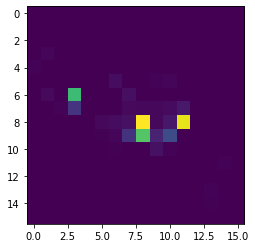

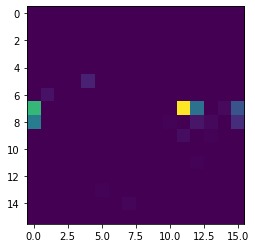

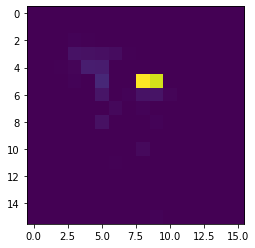

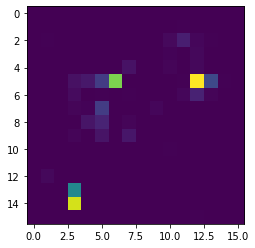

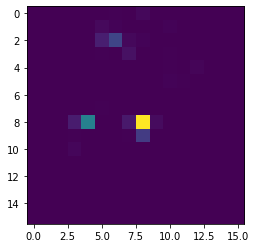

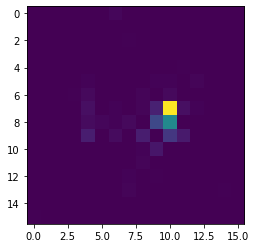

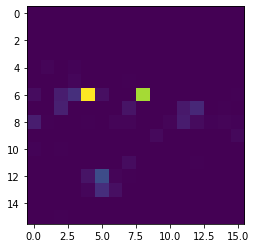

In [6]:
print(X.shape)
print(y.shape)



for i in range(20):
    plt.imshow(X[i])
    plt.grid(False)
    plt.show()

# Model

In [75]:
import torch.nn as nn

class tagger(torch.nn.Module):
    
    def __init__(self):
        
        super(tagger, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 , 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = nn.functional.relu(self.cnn1(x))
        #x = self.dropout(x)
        x = self.maxpool1(x)
        x = nn.functional.relu(self.cnn2(x))    
        x = self.maxpool2(x)
        #x = nn.functional.relu(self.cnn3(x))
        #x = self.maxpool3(x)
        x = x.reshape(x.shape[0], -1)
        #x = nn.functional.relu(self.fc1(x))
        #x = nn.functional.relu(self.fc2(x))
        #x = self.dropout(x)
        x = self.fc1(x)
        
        return x

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape((ds_size, wi * le))).reshape((ds_size, wi, le))

ntrain = ds_size*0.8

X_train = X[:int(ntrain)]
y_train = y[:int(ntrain)]

X_test = X[int(ntrain):]
y_test = y[int(ntrain):]

X_val = X_train[:(int(ntrain*0.1))]
y_val = y_train[:(int(ntrain*0.1))]
torch.manual_seed(55)

X_train = np.reshape(X_train, (int(ntrain), 1, le, wi))
X_val = np.reshape(X_val, (int(ntrain*0.1), 1, le, wi))
X_test = np.reshape(X_test, (int(ds_size - ntrain), 1, le, wi))



In [77]:
model = tagger()
learning_rate = 0.04
epochs = 30
batchsize = 1000
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, threshold=0.01)

model

train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))
training_accuracy_list = np.zeros((epochs,))

In [78]:
import tqdm
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()
batch_X = torch.split(X_train, batchsize)
batch_y = torch.split(y_train, batchsize)
batch_split = len(batch_X)

for epoch in tqdm.trange((epochs)):
    acc = 0
    for k in range(batch_split): 
        optimizer.zero_grad()
        batch_output = model(batch_X[k])
        loss = loss_func(batch_output, batch_y[k])
        train_loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        acc+=(batch_output.round() == batch_y[k]).sum()/float(batch_output.shape[0]) 
    for param_group in optimizer.param_groups:
        cLR = param_group['lr']
    with torch.no_grad():
        val_outputs = model(X_val)
        val_cor = (torch.argmax(val_outputs, dim=1) == y_val).type(torch.FloatTensor)
        val_per = np.round(val_cor.mean().numpy() * 100, 2)
        validation_accuracy_list[epoch] = val_cor.mean()
        print("epoch: "+ str(epoch), "lr: " + str(cLR), "train_acc: " + str(round((acc/(k+1)).detach().item() *100, 2)) + "%", "val_acc: " + str(val_per) + '%', "training loss: " + str(loss.item()), flush=True)

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

epoch: 0 lr: 0.04 train_acc: 300.01% val_acc: 44.12% training loss: 1.285679578781128


  3%|██▊                                                                                | 1/30 [00:04<02:05,  4.34s/it]

epoch: 1 lr: 0.04 train_acc: 26.25% val_acc: 46.69% training loss: 1.2220772504806519


  7%|█████▌                                                                             | 2/30 [00:08<02:01,  4.35s/it]

epoch: 2 lr: 0.04 train_acc: 38.78% val_acc: 46.35% training loss: 1.2172285318374634


 10%|████████▎                                                                          | 3/30 [00:13<01:56,  4.33s/it]

epoch: 3 lr: 0.04 train_acc: 44.42% val_acc: 48.88% training loss: 1.2375993728637695


 13%|███████████                                                                        | 4/30 [00:17<01:52,  4.33s/it]

epoch: 4 lr: 0.04 train_acc: 50.65% val_acc: 48.99% training loss: 1.201490044593811


 17%|█████████████▊                                                                     | 5/30 [00:21<01:47,  4.31s/it]

epoch: 5 lr: 0.04 train_acc: 54.25% val_acc: 48.91% training loss: 1.1891462802886963


 20%|████████████████▌                                                                  | 6/30 [00:26<01:44,  4.34s/it]

epoch: 6 lr: 0.04 train_acc: 51.05% val_acc: 50.05% training loss: 1.172363519668579


 23%|███████████████████▎                                                               | 7/30 [00:30<01:40,  4.35s/it]

epoch: 7 lr: 0.04 train_acc: 52.39% val_acc: 50.31% training loss: 1.1894559860229492


 27%|██████████████████████▏                                                            | 8/30 [00:34<01:36,  4.38s/it]

epoch: 8 lr: 0.04 train_acc: 53.3% val_acc: 49.75% training loss: 1.16718327999115


 30%|████████████████████████▉                                                          | 9/30 [00:39<01:32,  4.42s/it]

epoch: 9 lr: 0.04 train_acc: 51.47% val_acc: 50.54% training loss: 1.161988615989685


 33%|███████████████████████████▎                                                      | 10/30 [00:43<01:29,  4.47s/it]

epoch: 10 lr: 0.04 train_acc: 50.59% val_acc: 51.41% training loss: 1.1507893800735474


 37%|██████████████████████████████                                                    | 11/30 [00:48<01:25,  4.49s/it]

epoch: 11 lr: 0.04 train_acc: 49.85% val_acc: 50.81% training loss: 1.1905977725982666


 40%|████████████████████████████████▊                                                 | 12/30 [00:52<01:20,  4.46s/it]

epoch: 12 lr: 0.04 train_acc: 47.31% val_acc: 50.95% training loss: 1.1632764339447021


 43%|███████████████████████████████████▌                                              | 13/30 [00:57<01:15,  4.46s/it]

epoch: 13 lr: 0.04 train_acc: 47.03% val_acc: 51.45% training loss: 1.1625773906707764


 47%|██████████████████████████████████████▎                                           | 14/30 [01:01<01:11,  4.47s/it]

epoch: 14 lr: 0.04 train_acc: 44.82% val_acc: 51.67% training loss: 1.1590216159820557


 50%|█████████████████████████████████████████                                         | 15/30 [01:06<01:06,  4.46s/it]

epoch: 15 lr: 0.04 train_acc: 46.7% val_acc: 51.92% training loss: 1.179619550704956


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:10<01:01,  4.42s/it]

epoch: 16 lr: 0.04 train_acc: 47.79% val_acc: 52.19% training loss: 1.1653821468353271


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:14<00:57,  4.39s/it]

epoch: 17 lr: 0.04 train_acc: 45.68% val_acc: 52.17% training loss: 1.162840723991394


 60%|█████████████████████████████████████████████████▏                                | 18/30 [01:19<00:52,  4.37s/it]

epoch: 18 lr: 0.04 train_acc: 44.04% val_acc: 52.06% training loss: 1.1575862169265747


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:23<00:48,  4.38s/it]

epoch: 19 lr: 0.04 train_acc: 44.97% val_acc: 51.69% training loss: 1.1759452819824219


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:28<00:43,  4.40s/it]

epoch: 20 lr: 0.04 train_acc: 43.48% val_acc: 51.56% training loss: 1.1450926065444946


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [01:32<00:39,  4.38s/it]

epoch: 21 lr: 0.04 train_acc: 41.8% val_acc: 51.56% training loss: 1.1582907438278198


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [01:36<00:34,  4.35s/it]

epoch: 22 lr: 0.04 train_acc: 42.42% val_acc: 52.4% training loss: 1.1698013544082642


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [01:41<00:30,  4.35s/it]

epoch: 23 lr: 0.04 train_acc: 44.27% val_acc: 52.25% training loss: 1.1388018131256104


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [01:45<00:26,  4.37s/it]

epoch: 24 lr: 0.04 train_acc: 37.84% val_acc: 52.13% training loss: 1.1489402055740356


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [01:49<00:21,  4.35s/it]

epoch: 25 lr: 0.04 train_acc: 41.47% val_acc: 52.24% training loss: 1.1492398977279663


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [01:54<00:17,  4.33s/it]

epoch: 26 lr: 0.04 train_acc: 39.57% val_acc: 50.66% training loss: 1.1760936975479126


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [01:58<00:12,  4.33s/it]

epoch: 27 lr: 0.04 train_acc: 40.4% val_acc: 52.5% training loss: 1.1700462102890015


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [02:02<00:08,  4.33s/it]

epoch: 28 lr: 0.04 train_acc: 39.58% val_acc: 51.5% training loss: 1.1602623462677002


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [02:07<00:04,  4.34s/it]

epoch: 29 lr: 0.04 train_acc: 36.57% val_acc: 51.59% training loss: 1.1593822240829468


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.38s/it]


In [11]:
with torch.no_grad():
    
    y_pred_test = model(X_test)
    
    correct = (torch.argmax(y_pred_test, dim=1) == y_test).type(torch.FloatTensor)
    
    print("Testing Accuracy: " + str(correct.mean().numpy()*100))
    

Testing Accuracy: 50.609999895095825


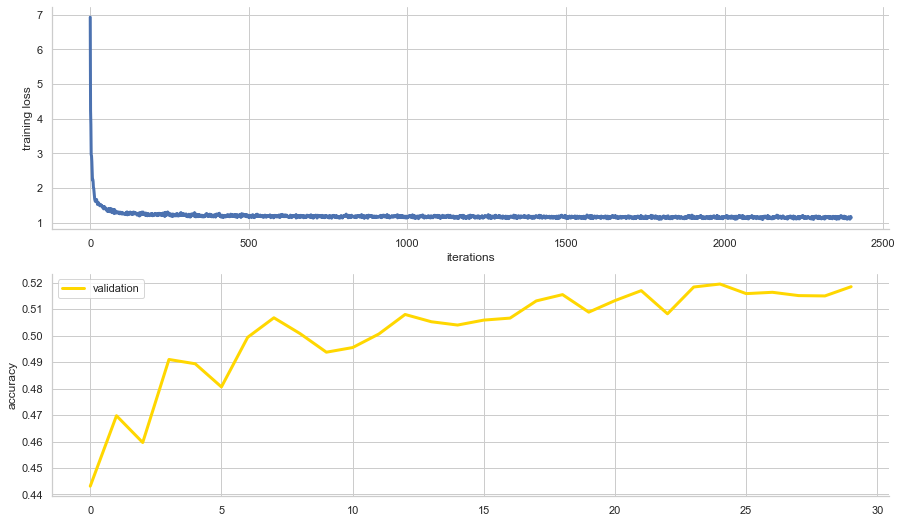

In [12]:
import seaborn as sns

sns.set(style = 'whitegrid', font_scale = 1)
plt.figure(figsize = (15, 9))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.xlabel("iterations")
sns.despine()

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold',  label="validation")
#plt.plot(training_accuracy_list, linewidth = 3, color = 'red', label="training")
plt.ylabel("accuracy")
plt.legend()
sns.despine()


In [ ]:
## WITH BATCHES

import tqdm
# Features -> floating numbers, Target labels -> int64 format
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()


X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

batch_X = torch.split(X_train, batchsize)
batch_y = torch.split(y_train, batchsize)
batch_split = len(batch_X)

for epoch in tqdm.trange((epochs)):
    
    batch_acc = []
    
    for k in range(batch_split): 
        optimizer.zero_grad()
        #print(train_batches_features[k].size())
        batch_output = model(batch_X[k])
        loss = loss_func(batch_output, batch_y[k])
        train_loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        
        #tr_cor = (torch.argmax(batch_output, dim=1) == batch_y).type(torch.FloatTensor)
        #batch_acc.append(tr_cor.mean())
    
    #avg_batch_acc = sum(batch_acc)/len(batch_acc)
    avg_batch_acc = 0
    #training_accuracy_list[epoch] = avg_batch_acc
    
    with torch.no_grad():
        val_outputs = model(X_val)
        val_cor = (torch.argmax(val_outputs, dim=1) == y_val).type(torch.FloatTensor)
        val_per = np.round(val_cor.mean().numpy() * 100, 2)
        validation_accuracy_list[epoch] = val_cor.mean()
        
        print("epoch: "+ str(epoch), "val_acc: " + str(val_per) + '%', "training loss: " + str(loss.item()), flush=True)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision import transforms
from PIL import Image

class mydataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.from_numpy(targets).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8))
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

print(type(y))

ntrain = ds_size*0.8

batchsize = 100


transform = transforms.Compose([transforms.ToTensor()])
dataset = mydataset(X, y, transform=transform)
dataloader = DataLoader(dataset, batch_size=batchsize)

alltrain, test_set = torch.utils.data.random_split(dataset, [int(ntrain), int(ds_size-ntrain)])
train_set, val_set = torch.utils.data.random_split(alltrain, [int(ntrain*0.8), int(ntrain*0.2)])

trainloader = DataLoader(train_set, batch_size=batchsize)
testloader = DataLoader(test_set, batch_size=batchsize)
valloader = DataLoader(val_set, batch_size=batchsize)